In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# npzファイルの読み込みと展開

In [3]:
npz=np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train=npz['X']
y_train=npz['y']

# 1. データをダウンロードする

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

# 2. データを分析する

# 2-1. データラベルの分布を可視化する(2Dプロット)

In [10]:
labels, label_count = np.unique(y_train, return_counts=True)
print(labels)
print(label_count)

[0 1 2 3 4 5 6 7 8 9]
[4146 3371 5362 4904 4089 3252 5326 5012 5851 4164]


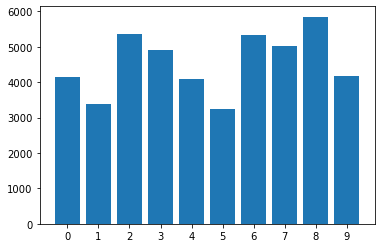

In [12]:
plt.bar(labels, label_count)
plt.xticks(range(0,10))
plt.show()

# 2-2. データ値の範囲を可視化する

In [14]:
print(X_train.shape)

(45477, 28, 28)


In [17]:
print(X_train.ravel().shape)

(35653968,)


In [48]:
#一次元のリストの返却.ravelでデータの展開、データの数、高さ、幅の三次元(写真の枚数、ピクセルの位置を全部横に並べる)

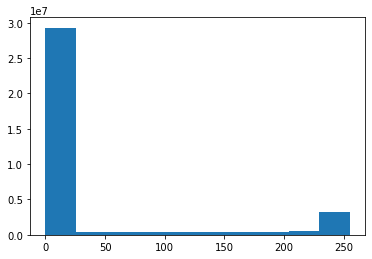

In [19]:
plt.hist(X_train.ravel())
plt.show()

In [22]:
np.isnan(X_train.ravel()).sum()

0

# 2-3.画像を見る

In [24]:
import matplotlib as mpl

In [25]:
import matplotlib.pyplot as plt

In [26]:
some_digit=X_train[0]

In [27]:
some_digit_image=some_digit.reshape(28,28)

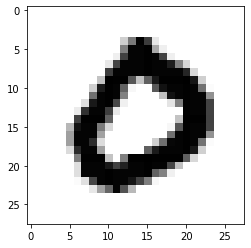

In [28]:
plt.imshow(some_digit_image, cmap='binary')

In [29]:
some_digit_01=X_train[995]

In [30]:
some_digit_01_image=some_digit_01.reshape(28,28)

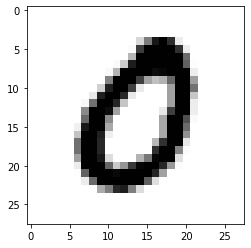

In [31]:
plt.imshow(some_digit_01_image, cmap='binary')

In [32]:
some_digit_02=X_train[15699]

In [33]:
some_digit_02_image=some_digit_02.reshape(28,28)

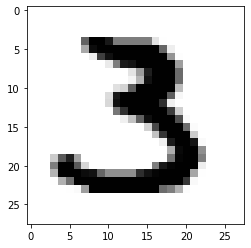

In [34]:
plt.imshow(some_digit_02_image, cmap='binary')

In [35]:
some_digit_03=X_train[9599]

In [36]:
some_digit_03_image=some_digit_03.reshape(28,28)

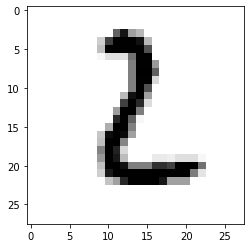

In [37]:
plt.imshow(some_digit_03_image, cmap='binary')

In [38]:
def show_image_by_label(X, y, target_label, show_num=6, figsize=(8,8), random=True):
    X_sub, y_sub = X[y==target_label], y[y==target_label]
    if random:
        rnd_idx = np.random.permutation(len(X_sub))[:show_num]
        X_sub, y_sub = X_sub[rnd_idx], y_sub[rnd_idx]
    X_sub, y_sub = X_sub[:show_num], y_sub[:show_num]
    
    rows, cols = np.ceil(show_num/2), 3
    plt.figure(figsize=figsize)
    print("Showing image with label: {}".format(target_label))
    for i, img in enumerate(X_sub):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
    plt.show()

Showing image with label: 0


<ipython-input-38-6e82cad3a2eb>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


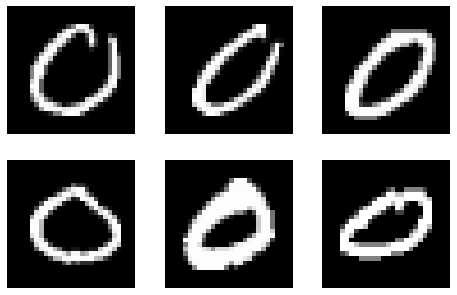

Showing image with label: 1


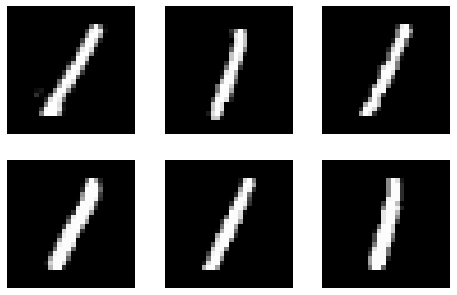

Showing image with label: 2


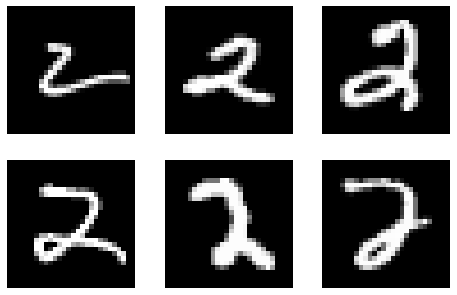

Showing image with label: 3


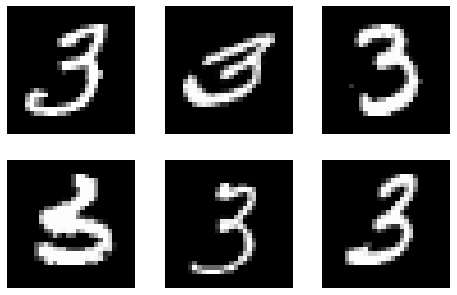

Showing image with label: 4


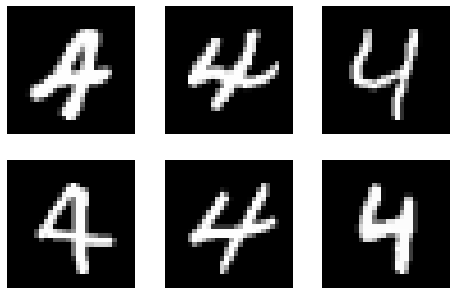

Showing image with label: 5


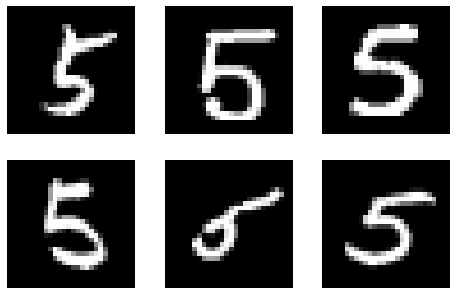

Showing image with label: 6


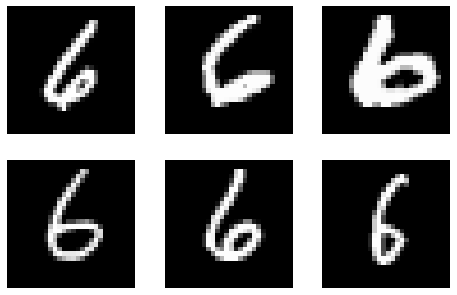

Showing image with label: 7


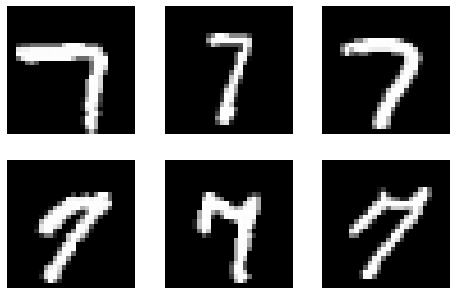

Showing image with label: 8


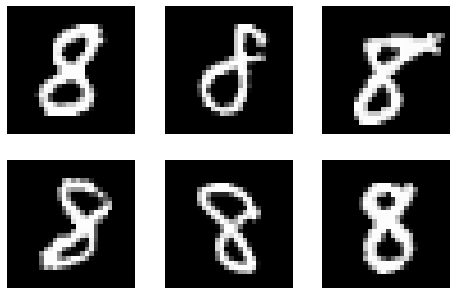

Showing image with label: 9


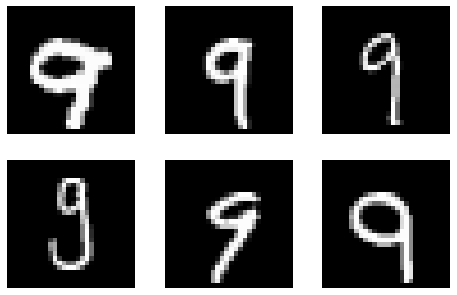

In [39]:
for label in np.unique(y_train):
    show_image_by_label(X_train, y_train, target_label=label)

# 3. データを前処理する

# 3-1. データを訓練データとテストデータに分ける

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
# npzファイルの読み込みと展開
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

 # 3-2. 標準化して、データのレンジを絞る

In [68]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

(array([29308353.,   442527.,   396522.,   338667.,   345633.,   401612.,
          352082.,   401555.,   476293.,  3190724.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

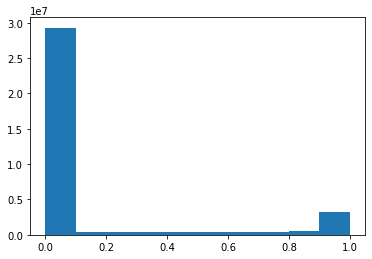

In [79]:
#各データの中のピクセルの個数 [10^7個]
plt.hist(X_train_scaled.ravel())

In [70]:
#訓練データとテストデータに分ける(引数stratify)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled, 
                                                      shuffle=True, test_size=0.15, stratify=y_train_scaled)

In [71]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))

Train data shape, X_train.shape:(38655, 28, 28) y_train.shape:(38655,)


In [72]:
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_valid.shape:(6822, 28, 28) y_valid.shape:(6822,)


(array([3524., 2865., 4558., 4168., 3476., 2764., 4527., 4260., 4973.,
        3540.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

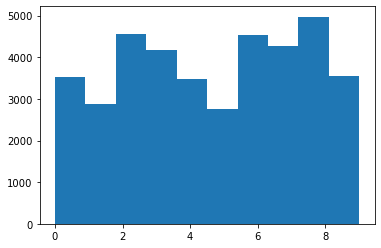

In [73]:
plt.hist(y_train)

(array([622., 506., 804., 736., 613., 488., 799., 752., 878., 624.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

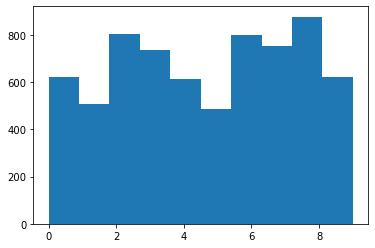

In [74]:
plt.hist(y_valid)

 # 4. 訓練データでモデルを学習する

 # 4-1. モデルを選択する

In [75]:
#ロジスティック回帰を用いる
X_train_logireg, X_valid_logireg = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_logireg.shape)
print(X_valid_logireg.shape)
#データを分割したときに確認

(38655, 784)
(6822, 784)


In [81]:
#モデルのインスタンス化、p74
model_logireg = LogisticRegression(verbose=1)

In [82]:
model_logireg.fit(X_train_logireg, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s finished


LogisticRegression(verbose=1)

 # 5. 精度を評価する 

In [87]:
#訓練データとテストデータの精度
y_logireg_train_predictions = model_logireg.predict(X_train_logireg)
y_logireg_valid_predictions = model_logireg.predict(X_valid_logireg)

accuracy_logireg_train = accuracy_score(y_train, y_logireg_train_predictions)
accuracy_logireg_valid = accuracy_score(y_valid, y_logireg_valid_predictions)

print("Train accuracy", accuracy_logireg_train)
print("Valid accuracy", accuracy_logireg_valid)

Train accuracy 0.9392575346009572
Valid accuracy 0.920257988859572


In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
#精度を混同行列で評価する
matrix_logireg_valid = confusion_matrix(y_valid, y_logireg_valid_predictions)

In [94]:
matrix_logireg_valid

array([[593,   0,   7,   1,   3,   5,   4,   1,   7,   1],
       [  0, 488,   2,   2,   0,   2,   0,   2,   9,   1],
       [  1,   7, 728,  19,   9,   3,  11,   7,  14,   5],
       [  5,   1,  18, 655,   1,  18,   2,  10,  22,   4],
       [  2,   4,   4,   0, 562,   1,   5,   7,   6,  22],
       [  8,   4,   4,  13,   7, 422,   7,   2,  19,   2],
       [  4,   1,   8,   0,  12,   8, 759,   0,   7,   0],
       [  1,   2,  10,   4,   2,   2,   1, 705,   3,  22],
       [  3,   7,  12,  16,   4,  17,   5,   1, 803,  10],
       [  3,   2,   2,   7,  23,   2,   0,  18,   4, 563]], dtype=int64)

<AxesSubplot:>

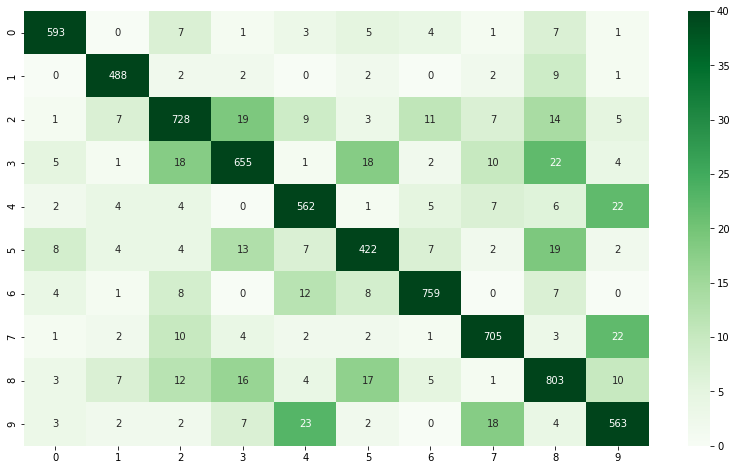

In [103]:
#ヒートマップによる二次元データを可視化
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
#scikit-learnのドキュメントを参照すること
plt.figure(figsize=(14,8))
sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Greens', vmin=0, vmax=40)